# HealthApp Log Analysis Assignment

In the assignment we have used dataset given in https://github.com/nishantparihar/loghub/tree/master/HealthApp github repository.

### About Dataset

The dataset consists of an application logs from an Android smartphone.
It has activity of a person like steps count, calories etc.

After analysing dataset it is found that it has logs of two days dated 2017-12-23 and 2017-12-24 of the person.
It has activity data of 2017-12-23 from 22:15:29:606 to 0:0:0:000 and activity data of 2017-12-24 from 0:0:0:000 to 1:2:35:789.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp -ri  "/content/gdrive/MyDrive/Health_App_Log_Processing/HealthApp_2k.log_structured.csv" "/content/gdrive/MyDrive/Health_App_Log_Processing/HealthApp_2k.log_templates.csv" "/content/gdrive/MyDrive/Wav2Lip/Input-Audio.wav" /content/sample_data/

In [4]:
import pandas as pd

Importing Dataset

In [6]:
file_path = '/content/sample_data/HealthApp_2k.log_structured.csv'

# Read CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

In [7]:
# creating Time to Timestamp
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')
df.rename(columns = {'Time':'Timestamp'}, inplace = True)

In [8]:
# Takingout date and time from Timestamp
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

In [9]:
# Selecting rows with steps details
setTodayTotalDetailSteps = df[df['EventId'].astype(str).str.strip() == 'E58']

### DATE:  2017-12-23

In [34]:
# separating steps data of date 23/12/2017

setTodayTotalDetailSteps_date23 = setTodayTotalDetailSteps[setTodayTotalDetailSteps["Date"] == pd.to_datetime("2017-12-23").date()]
setTodayTotalDetailSteps_date23_withSteps = setTodayTotalDetailSteps_date23.copy()
setTodayTotalDetailSteps_date23_withSteps['steps'] = setTodayTotalDetailSteps_date23_withSteps.loc[:,'Content'].str.extract(r'##(\d+)')

In [36]:
# Total steps taken on 23/12/2017
print("Total steps: ",int(setTodayTotalDetailSteps_date23_withSteps['steps'].max()))

Total steps:  7214


In [52]:
# Calculating hourly steps count
setTodayTotalDetailSteps_date23_withSteps['hour_range'] = setTodayTotalDetailSteps_date23_withSteps['Timestamp'].dt.strftime('%I %p') + ' - ' + (setTodayTotalDetailSteps_date23_withSteps['Timestamp'] + pd.Timedelta(hours=1)).dt.strftime('%I %p')
hourly_steps_diff23 = setTodayTotalDetailSteps_date23_withSteps.groupby('hour_range')['steps'].agg(lambda x: int(x.max()) - int(x.min())).reset_index()

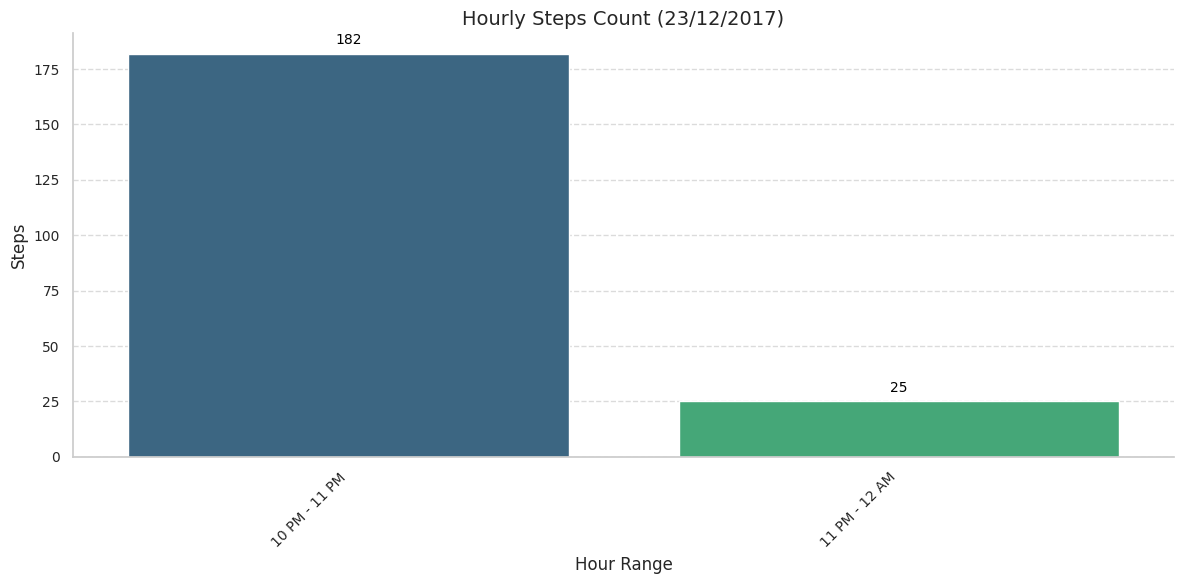

In [53]:
# Plotting bar chart of hourly steps count

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot bar chart with enhanced style
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='hour_range', y='steps', data=hourly_steps_diff23, palette='viridis')

# Add values above the bars
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.xlabel('Hour Range', fontsize=12)
plt.ylabel('Steps', fontsize=12)
plt.title('Hourly Steps Count (23/12/2017)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)
plt.tight_layout()

# Show the plot
plt.show()


In [54]:
# Calculating whoe day activity minute wise
setTodayTotalDetailSteps_date23_withSteps['minute_range'] = setTodayTotalDetailSteps_date23_withSteps['Timestamp'].dt.strftime('%I:%M %p') + ' - ' + (setTodayTotalDetailSteps_date23_withSteps['Timestamp'] + pd.Timedelta(minutes=1)).dt.strftime('%I:%M %p')
minute_steps_diff23 = setTodayTotalDetailSteps_date23_withSteps.groupby('minute_range')['steps'].agg(lambda x: int(x.max()) - int(x.min())).reset_index()

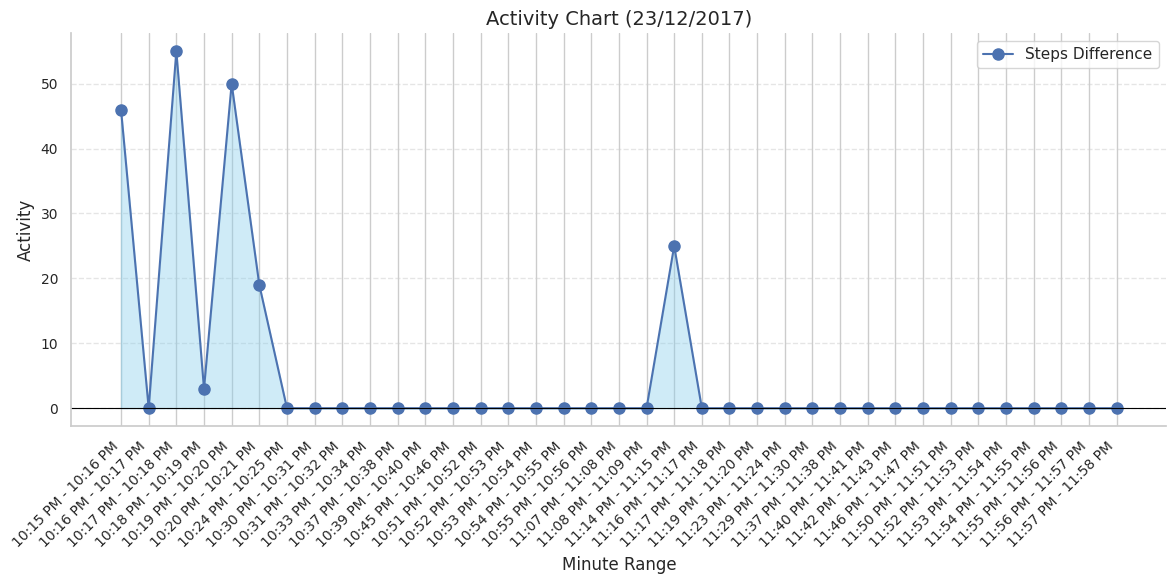

In [55]:
# Plotting whole day activity minute wise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot line chart with enhanced style
plt.figure(figsize=(12, 6))

# Line plot with markers
plt.plot(minute_steps_diff23['minute_range'], minute_steps_diff23['steps'], marker='o', linestyle='-', color='b', label='Steps Difference', markersize=8)

# Adding background color for better contrast
plt.axhline(0, color='black', linewidth=0.8)
plt.fill_between(minute_steps_diff23['minute_range'], minute_steps_diff23['steps'], color='skyblue', alpha=0.4)

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customizing labels and title
plt.xlabel('Minute Range', fontsize=12)
plt.ylabel('Activity', fontsize=12)
plt.title('Activity Chart (23/12/2017)', fontsize=14)

# Customizing ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adding legend
plt.legend()

# Removing spines
sns.despine(top=True, right=True)

# Adjusting layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### DATE:  2017-12-24

In [44]:
# separating steps data of date 24/12/2017
setTodayTotalDetailSteps_date24 = setTodayTotalDetailSteps[setTodayTotalDetailSteps["Date"] == pd.to_datetime("2017-12-24").date()]
setTodayTotalDetailSteps_date24_withSteps = setTodayTotalDetailSteps_date24.copy()
setTodayTotalDetailSteps_date24_withSteps['steps'] = setTodayTotalDetailSteps_date24_withSteps.loc[:,'Content'].str.extract(r'##(\d+)')

In [45]:
# Total steps taken on 24/12/2017
print("Total steps: ",int(setTodayTotalDetailSteps_date24_withSteps['steps'].max()))

Total steps:  0


In [56]:
# Calculating hourly steps count
setTodayTotalDetailSteps_date24_withSteps['hour_range'] = setTodayTotalDetailSteps_date24_withSteps['Timestamp'].dt.strftime('%I %p') + ' - ' + (setTodayTotalDetailSteps_date24_withSteps['Timestamp'] + pd.Timedelta(hours=1)).dt.strftime('%I %p')
hourly_steps_diff24 = setTodayTotalDetailSteps_date24_withSteps.groupby('hour_range')['steps'].agg(lambda x: int(x.max()) - int(x.min())).reset_index()

In [57]:
# No activity on 24/12/2017
hourly_steps_diff24

,hour_range,steps
0,12 AM - 01 AM,0
